In [1]:
import pandas as pd

df = pd.read_csv(r"C:\Users\HP\Downloads\car data.csv")
print(df.head())
print(df.info())

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  3

In [2]:
df.info()
df.describe()
df.isnull().sum()  # check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df['Car_Age'] = 2025 - df['Year']

In [5]:
df.drop(['Year', 'Car_Name'], axis=1, inplace=True)

In [6]:
df = pd.get_dummies(df, drop_first=True)

<Axes: >

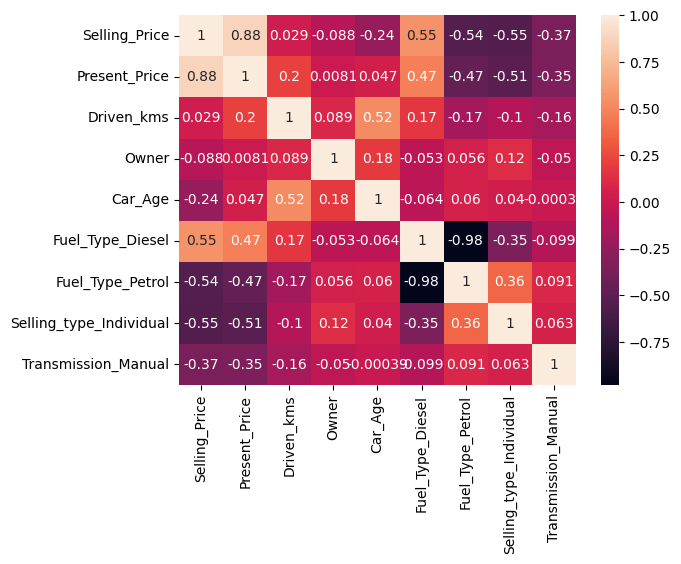

In [7]:
sns.heatmap(df.corr(), annot=True)


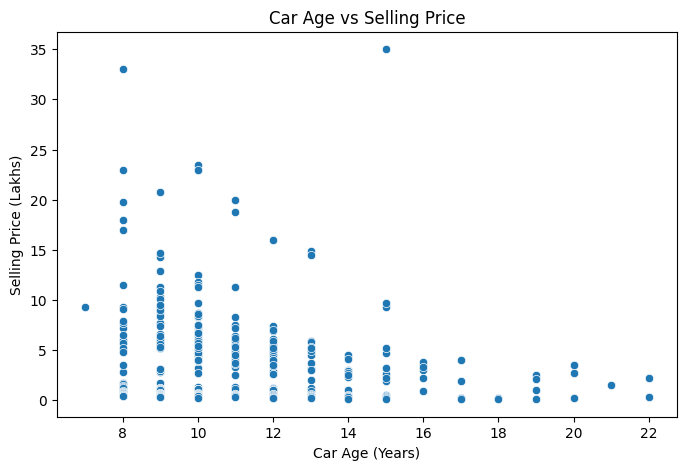

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.scatterplot(x='Car_Age', y='Selling_Price', data=df)
plt.title('Car Age vs Selling Price')
plt.xlabel('Car Age (Years)')
plt.ylabel('Selling Price (Lakhs)')
plt.show()


In [10]:
df = pd.read_csv(r"C:\Users\HP\Downloads\car data.csv")

In [11]:
df['Car_Age'] = 2025 - df['Year']

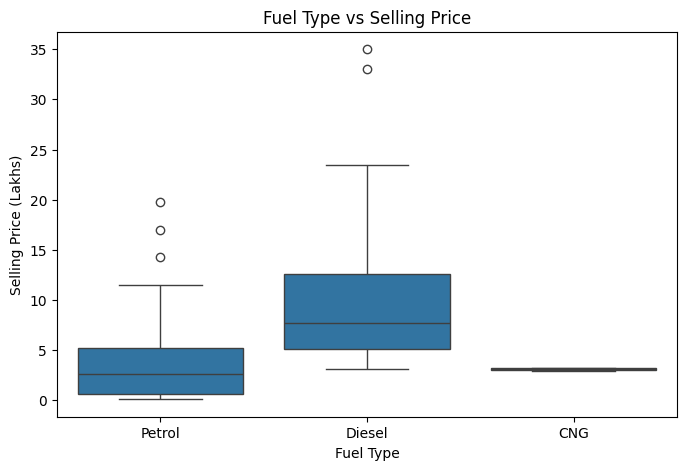

In [12]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df)
plt.title('Fuel Type vs Selling Price')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price (Lakhs)')
plt.show()

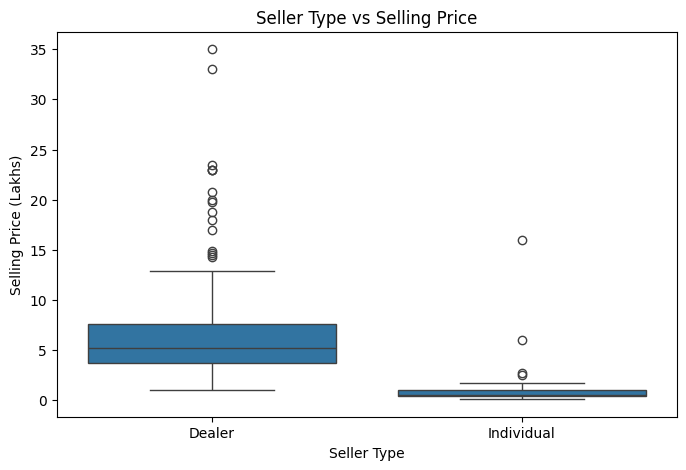

In [14]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Selling_type', y='Selling_Price', data=df)
plt.title('Seller Type vs Selling Price')
plt.xlabel('Seller Type')
plt.ylabel('Selling Price (Lakhs)')
plt.show()


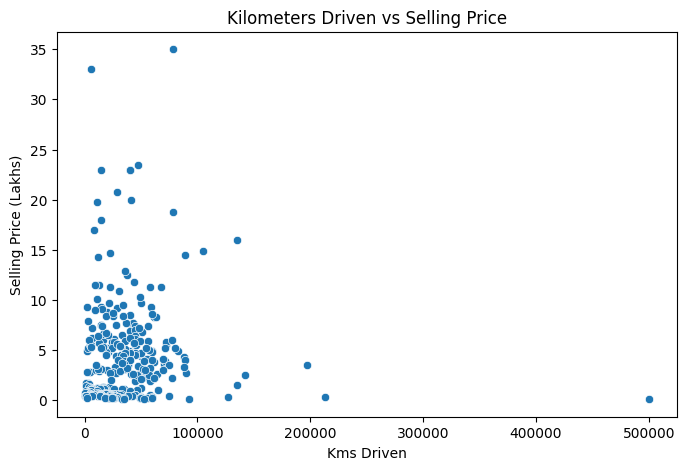

In [15]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Driven_kms', y='Selling_Price', data=df)
plt.title('Kilometers Driven vs Selling Price')
plt.xlabel('Kms Driven')
plt.ylabel('Selling Price (Lakhs)')
plt.show()


In [17]:
from sklearn.model_selection import train_test_split

X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


ValueError: could not convert string to float: 'Bajaj Pulsar 150'

In [19]:
print(X_train.dtypes)


Car_Name          object
Year               int64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
Car_Age            int64
dtype: object


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the dataset
df = pd.read_csv(r"C:\Users\HP\Downloads\car data.csv")

# Create 'Car_Age' from 'Year'
df['Car_Age'] = 2025 - df['Year']

# Drop 'Year' and 'Car_Name' since they're not useful for modeling
df.drop(['Year', 'Car_Name'], axis=1, inplace=True)

# Convert categorical features to numeric using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Separate features and target
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [21]:
print(X_train.dtypes)


Present_Price              float64
Driven_kms                   int64
Owner                        int64
Car_Age                      int64
Fuel_Type_Diesel              bool
Fuel_Type_Petrol              bool
Selling_type_Individual       bool
Transmission_Manual           bool
dtype: object


In [22]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

In [23]:
from sklearn.metrics import r2_score , mean_absolute_error

y_pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


R2 Score: 0.9514937950976377
MAE: 0.6695754098360662


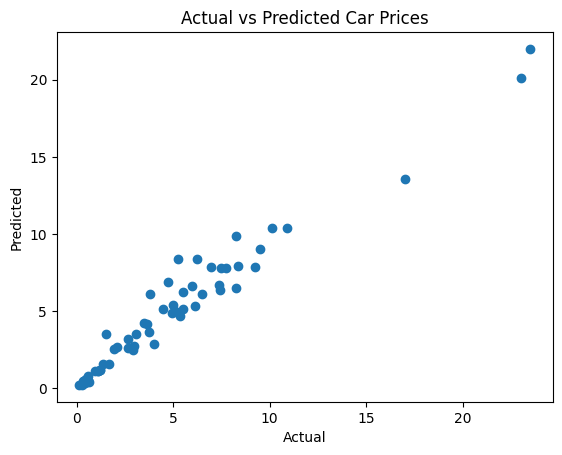

In [24]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Car Prices")
plt.show()


In [26]:
import pickle
with open('car_price_model.pkl', 'wb') as file:
    pickle.dump(model, file)


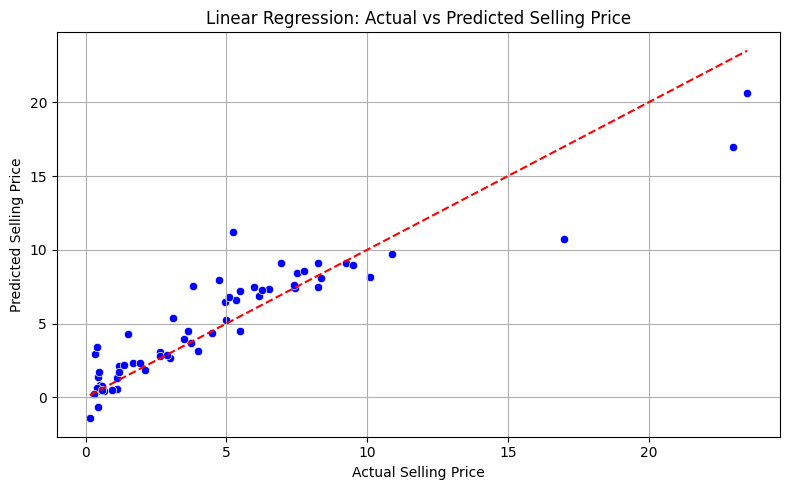

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# load dataset
df = pd.read_csv(r"C:\Users\HP\Downloads\car data.csv")


# Prepare features and target
X = df.drop(['Selling_Price', 'Car_Name'], axis=1)
y = df['Selling_Price']

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)

# Plot predictions vs actual
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred_lr, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Linear Regression: Actual vs Predicted Selling Price")
plt.grid(True)
plt.tight_layout()
plt.show()


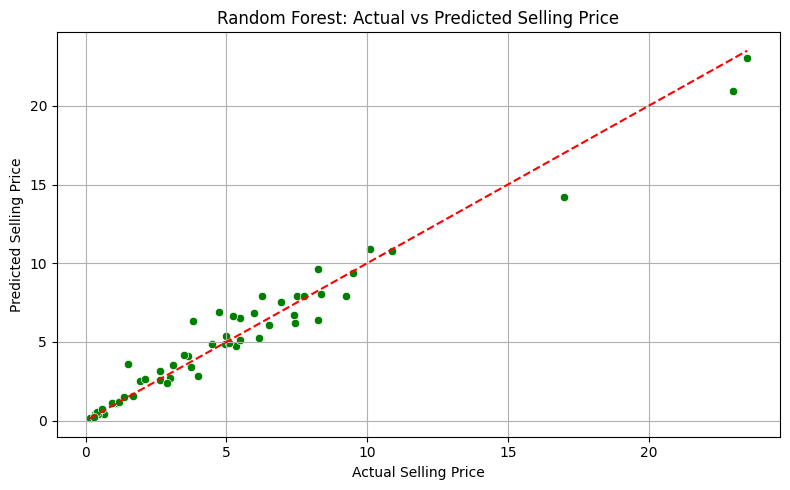

In [6]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Plot predictions vs actual
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred_rf, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Random Forest: Actual vs Predicted Selling Price")
plt.grid(True)
plt.tight_layout()
plt.show()
